# Get Piechart file
The first part of this file is the debugging area for the get piechart function that will eventually become a .py file. 

- The first part of this file will be working on creating a detailed and thoroughly explained dataframe of how \
    neuprint organizes their neuropil hierarchy, level 1 super categories and then level 2 neuropils.

- The second part will be troubleshooting how we filter the fetched neuron dataframe using the dataframe and \
    collapsing the right and left hemispheres into one.

- The function section of the file will be the resulting function that should do everything we need it to with processing \
    and then finally create the piecharts for each cluster.

In [3]:
# Imports
import os
import time
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from util import *

from neuprint import Client
from neuprint import fetch_neurons, NeuronCriteria as NC, fetch_all_rois, fetch_primary_rois, fetch_roi_hierarchy 
hemibrain_version = "v1.2.1"

auth_token_file = open("flybrain.auth.txt", 'r')
auth_token = next(auth_token_file).strip()
try:
    np_client = Client('neuprint.janelia.org', dataset='hemibrain:' + hemibrain_version, token=auth_token)
    log_msg("neuprint Client set up as `np_Client`, version", np_client.fetch_version())
except:
    np_client = None
    log_msg("neuprint Client set up failed!")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
2024 04 02 17:07:51  neuprint Client set up as `np_Client`, version 0.1.0


In [18]:
# Import roi data!! 
# Here we fetch the roi heirarchy and print it out including all subprimary rois
roi_cut = fetch_roi_hierarchy(include_subprimary=True, format = 'dict')

In [5]:
# Read in dataframe with super, l1, l2, l3, and l4. Created this file by following the output of the above print statement
# Super column is larger functional groups that we decided using Nomenclature paper (link)
roi_df = pd.read_excel('all_roi_df.xlsx')
roi_df

,Super,Super_split,L1,L2,L3,L4,Color
0,AL,AL(L),AL(L),NaN,NaN,NaN,cadetblue
1,NaN,NaN,NaN,AL-D(L),NaN,NaN,NaN
2,NaN,NaN,NaN,AL-DA2(L),NaN,NaN,NaN
3,NaN,NaN,NaN,AL-DA3(L),NaN,NaN,NaN
4,NaN,NaN,NaN,AL-DA4m(L),NaN,NaN,NaN
...,...,...,...,...,...,...,...
225,NaN,NaN,NaN,VES(L),NaN,NaN,NaN
226,NaN,NaN,NaN,VES(R),NaN,NaN,NaN
227,AL,AL(L),mALT(L),NaN,NaN,NaN,cadetblue
228,AL,AL(R),mALT(R),NaN,NaN,NaN,cadetblue


In [63]:
# Different levels of ROI can be accessed using the dropna() function
roi_super = roi_df['Super'].dropna()
roi_super_split = roi_df['Super_split'].dropna()
roi_l1 = roi_df['L1'].dropna()
roi_l2 = roi_df['L2'].dropna()
roi_l3 = roi_df['L3'].dropna()
roi_l4 = roi_df['L4'].dropna()
roi_l2

1         AL-D(L)
2       AL-DA2(L)
3       AL-DA3(L)
4      AL-DA4m(L)
5       AL-DC1(L)
          ...    
222        IPS(R)
223        SPS(L)
224        SPS(R)
225        VES(L)
226        VES(R)
Name: L2, Length: 133, dtype: object

In [16]:
roi_l4

104    NO1(L)
105    NO2(L)
106    NO3(L)
108    NO1(R)
109    NO2(R)
110    NO3(R)
162    a'1(R)
163    a'2(R)
164    a'3(R)
166     a1(R)
167     a2(R)
168     a3(R)
170    b'1(R)
171    b'2(R)
173     b1(R)
174     b2(R)
176     g1(R)
177     g2(R)
178     g3(R)
179     g4(R)
180     g5(R)
Name: L4, dtype: object

In [82]:
# Testing on how neuprint stores roi data in fetch neurons
direct = "oviIN_combined/preprocessed-v1.2.1"
filename = "preprocessed_nodes.csv"

# fetches partition data
log_msg("Loading node dataframe")
full = pd.read_csv(os.path.join(direct, filename))
log_msg("Done!")
full.head()

# reads all bodyIds in connectome
ids = full["id"]
_, roi_info = fetch_neurons(NC(bodyId=ids))
roi_info

2024 04 02 17:48:45  Loading node dataframe
2024 04 02 17:48:46  Done!


,bodyId,roi,pre,post,downstream,upstream,mito
0,203253253,ATL(L),0,13,0,13,5
1,203253253,CRE(-RUB)(L),0,6,0,6,6
2,203253253,CRE(L),0,6,0,6,6
3,203253253,ICL(L),0,22,0,22,1
4,203253253,INP,0,83,0,83,15
...,...,...,...,...,...,...,...
65839,7112625310,SMP(R),0,19,0,0,0
65840,7112625310,SNP(R),0,19,0,0,0
65841,7112626236,NotPrimary,0,0,0,0,0
65842,7112626236,SMP(L),6,39,38,39,10


In [51]:
full

,id,key,0.0,0.1,0.25,0.5,0.75,instance,celltype,pre,...,status,cropped,statusLabel,cellBodyFiber,somaRadius,somaLocation,roiInfo,notes,inputRois,outputRois
0,1003215282,1,1,1,1,1,1,CL229_R,CL229,100,...,Traced,False,Roughly traced,PDM19,301.0,"[23044, 14981, 11600]","{'INP': {'pre': 87, 'post': 351, 'downstream':...",NaN,"['EPA(R)', 'GOR(R)', 'IB', 'ICL(R)', 'INP', 'S...","['GOR(R)', 'IB', 'ICL(R)', 'INP', 'SCL(R)', 'S..."
1,1005952640,2,1,2,2,2,2,IB058_R,IB058,664,...,Traced,False,Roughly traced,PVL20,NaN,NaN,"{'INP': {'pre': 464, 'post': 1327, 'downstream...",NaN,"['ATL(R)', 'IB', 'ICL(R)', 'INP', 'PLP(R)', 'S...","['ATL(R)', 'IB', 'ICL(R)', 'INP', 'PLP(R)', 'S..."
2,1006928515,3,1,2,2,3,3,CL300_R,CL300,86,...,Traced,False,Roughly traced,PVL13,236.0,"[12083, 10523, 16816]","{'INP': {'pre': 79, 'post': 126, 'downstream':...",NaN,"['ATL(R)', 'IB', 'ICL(R)', 'INP', 'SCL(R)', 'S...","['ATL(R)', 'IB', 'ICL(R)', 'INP', 'SCL(R)', 'S..."
3,1007260806,4,1,1,1,4,4,CL301_R,CL301,119,...,Traced,False,Roughly traced,PVL13,236.0,"[13524, 10108, 16480]","{'INP': {'pre': 40, 'post': 128, 'downstream':...",NaN,"['GOR(R)', 'IB', 'ICL(R)', 'INP', 'PLP(R)', 'S...","['IB', 'ICL(R)', 'INP', 'PLP(R)', 'SCL(R)', 'S..."
4,1007308577,5,2,3,2,5,5,NaN,NaN,54,...,Traced,True,Leaves,NaN,NaN,NaN,"{'SNP(L)': {'pre': 5, 'post': 486, 'downstream...",NaN,"['ATL(L)', 'ATL(R)', 'GOR(L)', 'IB', 'ICL(L)',...","['ATL(L)', 'ATL(R)', 'IB', 'ICL(R)', 'INP', 'S..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6338,988654188,6339,2,596,684,1371,1908,NaN,NaN,11,...,Orphan,NaN,Orphan,NaN,NaN,NaN,"{'SNP(L)': {'pre': 11, 'post': 10, 'downstream...",NaN,"['SMP(L)', 'SNP(L)']","['SMP(L)', 'SNP(L)']"
6339,988905105,6340,5,621,1035,1597,31,NaN,NaN,0,...,Assign,NaN,0.5assign,NaN,NaN,NaN,"{'SNP(R)': {'post': 11}, 'SMP(R)': {'post': 11}}",NaN,"['SMP(R)', 'SNP(R)']",[]
6340,988909130,6341,5,9,16,133,72,FB5V_R,FB5V,269,...,Traced,False,Roughly traced,AVM10,296.5,"[13226, 32024, 18600]","{'SNP(R)': {'pre': 1, 'post': 28, 'downstream'...",CRELALFB5,"['AB(R)', 'CRE(-ROB,-RUB)(R)', 'CRE(R)', 'CX',...","['CRE(-ROB,-RUB)(R)', 'CRE(R)', 'CX', 'FB', 'F..."
6341,989224451,6342,1,622,1036,1598,9,NaN,NaN,0,...,Assign,NaN,0.5assign,NaN,NaN,NaN,"{'SNP(R)': {'post': 10}, 'SMP(R)': {'post': 10}}",NaN,"['SMP(R)', 'SNP(R)']",[]


# Testing Section

In [27]:
# Test by seeing how one bodyID's downstream and upstream connections add up
bodyID = 1007308577
roi_test = roi_info[roi_info["bodyId"] == bodyID]
roi_test

,bodyId,roi,pre,post,downstream,upstream,mito
41085,1007308577,ATL(L),8,270,63,270,28
41086,1007308577,ATL(R),5,95,29,95,17
41087,1007308577,GOR(L),0,19,0,19,1
41088,1007308577,IB,23,1614,127,1614,188
41089,1007308577,ICL(L),0,68,0,68,14
41090,1007308577,ICL(R),1,26,9,26,3
41091,1007308577,INP,37,2077,228,2077,252
41092,1007308577,NotPrimary,0,3,0,3,4
41093,1007308577,SCL(L),0,4,0,4,2
41094,1007308577,SIP(L),0,24,0,24,5


**Here we can see that 1007308577 has connections in multiple different neuropils**

If we filter it with roi_super (below 1 cell) we can pull out the "L1" roi Info.

When we filter it with roi_l2, we can see if they add up to the correct values in the super dataframe. This will tell us if the l2 column is enough or if there are some values missing (not totally conclusive as some levelings dont really align with super rois, for example MB(+ACA)(R))

NOTE FOR THIS TEST: Tested with super and l2. Filtering with l3 and l4 doesn't produce anything because it doesnt follow the neuropil path to get there, will need to test that to see if l3 and l4 also appear and endup in the final value

In [28]:
# processing through super level roi (L1), we can see that the 
# bodyID has 4 super level rois and these can break down to max level 2
test_onlysuper = roi_test[roi_test['roi'].isin(roi_super)]
test_onlysuper

,bodyId,roi,pre,post,downstream,upstream,mito
41091,1007308577,INP,37,2077,228,2077,252
41092,1007308577,NotPrimary,0,3,0,3,4
41102,1007308577,VMNP,11,145,62,145,37


In [29]:
# shows L2 neuropil processing
# this result was used to check that the L2 rois added up to the results of the
# previous df under the correct super level rois (it did)
test_onlyl2 = roi_test[roi_test['roi'].isin(roi_l2)]
test_onlyl2

,bodyId,roi,pre,post,downstream,upstream,mito
41085,1007308577,ATL(L),8,270,63,270,28
41086,1007308577,ATL(R),5,95,29,95,17
41087,1007308577,GOR(L),0,19,0,19,1
41088,1007308577,IB,23,1614,127,1614,188
41089,1007308577,ICL(L),0,68,0,68,14
41090,1007308577,ICL(R),1,26,9,26,3
41093,1007308577,SCL(L),0,4,0,4,2
41094,1007308577,SIP(L),0,24,0,24,5
41095,1007308577,SMP(L),5,462,22,462,84
41096,1007308577,SMP(R),1,29,4,29,5


In [30]:
# Doesnt produce anything at L3
roi_test[roi_test['roi'].isin(roi_l3)]

,bodyId,roi,pre,post,downstream,upstream,mito


**Here we can see that 456846996 has connectionss specifically CX, MB(L) and MB(R)+ACA**

These super rois breakdown to at least l3 if not level 4, I will make sure that the neuropils are added up the same way (higher levels repeating the synapse number of the lower level) (supers being all inclusive)

This bodyId was a great test because it can be filtered down to the fourth level which was used to check how counting works and if my dataframe aligned with that

In [31]:
test_EB = roi_info[roi_info['bodyId']==456846996]

In [32]:
# Seeing what super rois are present, I see CX is present and I choose to count up 
# any synapses in neuropils and subneuropils that are present to see if the the pattern is the same
test_onlysuperEB = test_EB[test_EB['roi'].isin(roi_super)]
test_onlysuperEB

,bodyId,roi,pre,post,downstream,upstream,mito
6389,456846996,CX,1,0,4,0,1
6392,456846996,INP,6,5,15,5,5
6396,456846996,NotPrimary,3,4,9,4,11


In [33]:
# filtering level 2
test_onlyl2EB = test_EB[test_EB['roi'].isin(roi_l2)]
test_onlyl2EB

,bodyId,roi,pre,post,downstream,upstream,mito
6387,456846996,CRE(L),2,4,6,4,1
6388,456846996,CRE(R),4,1,9,1,4
6390,456846996,EB,1,0,4,0,1
6395,456846996,MB(R),104,210,385,210,37
6397,456846996,SIP(R),0,12,0,12,2
6398,456846996,SLP(R),8,76,26,76,21
6399,456846996,SMP(R),16,182,68,182,25
6405,456846996,b'L(L),27,38,87,38,11
6407,456846996,bL(L),0,2,0,2,2


In [34]:
# Filtering level3
test_EB[test_EB['roi'].isin(roi_l3)]

,bodyId,roi,pre,post,downstream,upstream,mito
6385,456846996,"CRE(-ROB,-RUB)(R)",4,1,9,1,4
6386,456846996,CRE(-RUB)(L),2,4,6,4,1
6391,456846996,EBr3am,1,0,4,0,1
6402,456846996,aL(R),96,193,363,193,29
6406,456846996,b'L(R),8,15,22,15,8
6409,456846996,gL(R),0,2,0,2,0


In [35]:
# testing level 4
""" Here at level 4 filtering, the level 4 a1(R) sub-roi falls under aL(R) in level 3 with 363 downstream synapses 
and 193 upstream synapses. b'1(R) and b'2(R) fall under b'L(R) in level 3, 
b'1(R) has 10 downstream synapses and 7 upstream synapses, 
b'2(R) has 12 downstream synapses and 8 upstream synapses.
g2(R) falls under gL(R) in level 3 with 2 upstream synapses.

Moving up to level 3 filtering we should expect to see aL(R) with 363 downstream synapses and 193 upstream synapses,
b'L(R) with 22 downstream synapses and 15 upstream synapses, and gL(R) with 2 upstream synapses. (YAY this aligns)

Moving up to level 2 filtering we should expect to see MB(R) with 385 downstream synapses and 210 upstream synapses, 
(yes this aligns)
"""
test_EB[test_EB['roi'].isin(roi_l4)]

,bodyId,roi,pre,post,downstream,upstream,mito
6401,456846996,a1(R),96,193,363,193,29
6403,456846996,b'1(R),3,7,10,7,2
6404,456846996,b'2(R),5,8,12,8,6
6408,456846996,g2(R),0,2,0,2,0


**From here the last thing I want to test is the handling of unqiue rois, those that fall either into their own\
category or just seem to be random**

In [36]:
# The first roi is the dACA (R), seeing how this is handled should also tell us about lACA(R) and vACA (R)
roi_info[roi_info['roi']=='dACA(R)']
# I will choose the first bodyID 295802733

,bodyId,roi,pre,post,downstream,upstream,mito
267,295802733,dACA(R),6,86,40,86,10
279,295828029,dACA(R),1,9,3,9,2
308,296139882,dACA(R),24,45,246,45,5
397,296203440,dACA(R),0,1,0,1,1
429,296535619,dACA(R),0,9,0,9,0
...,...,...,...,...,...,...,...
63652,5813078557,dACA(R),0,1,0,1,0
63690,5813078603,dACA(R),108,239,517,239,39
64712,5813105726,dACA(R),13,77,149,77,11
65066,5813130028,dACA(R),0,1,0,1,0


In [37]:
# Here i can see already that dACA is counted under MB(+ACA)(R) and not under MB(R) as 
# MB(R) does not show up and MB(+ACA)(R) shows up with the exact same synapse count in 
# downstream and upstream as dACA(R)
test_d = roi_info[roi_info['bodyId']==295802733]
test_d

,bodyId,roi,pre,post,downstream,upstream,mito
256,295802733,INP,0,21,0,21,3
257,295802733,LH(R),0,2,0,2,3
258,295802733,MB(+ACA)(R),6,86,40,86,10
259,295802733,NotPrimary,0,3,0,3,21
260,295802733,PLP(R),3,52,27,52,8
261,295802733,SCL(R),0,21,0,21,3
262,295802733,SIP(R),59,78,576,78,37
263,295802733,SLP(R),113,1040,930,1040,187
264,295802733,SMP(R),229,478,2179,478,96
265,295802733,SNP(R),401,1596,3685,1596,320


In [38]:
test_ammc = roi_info[roi_info['roi']=='AMMC']

In [39]:
roi_info[roi_info['bodyId']==642723975]   

,bodyId,roi,pre,post,downstream,upstream,mito
18263,642723975,AL(R),0,18,0,18,3
18264,642723975,AL-VP2(R),0,6,0,6,1
18265,642723975,AMMC,0,1,0,1,0
18266,642723975,AVLP(R),3,5,13,5,11
18267,642723975,"CRE(-ROB,-RUB)(R)",75,53,676,53,16
18268,642723975,CRE(R),75,53,676,53,16
18269,642723975,GNG,0,12,0,12,4
18270,642723975,INP,161,109,1455,109,43
18271,642723975,LAL(-GA)(R),1,75,2,75,31
18272,642723975,LAL(R),1,75,2,75,31


**In this next part I want to test wether the merge acts correctly**

In [53]:
# I will use the dataframe I created that follows the roi hierarchy (roi_info)
# filter roi data to only include the super roi data as we dont want any repeated synapses
# and the super rois are the highest level of the hierarchy
roi_edited = roi_info[roi_info['roi'].isin(roi_l1)]
# Attach roi_info to the full partition dataframe
full_roi = pd.merge(full, roi_edited, left_on='id', right_on='bodyId', how='inner')
full_roi

,id,key,0.0,0.1,0.25,0.5,0.75,instance,celltype,pre_x,...,notes,inputRois,outputRois,bodyId,roi,pre_y,post_y,downstream_y,upstream_y,mito_y
0,1003215282,1,1,1,1,1,1,CL229_R,CL229,100,...,NaN,"['EPA(R)', 'GOR(R)', 'IB', 'ICL(R)', 'INP', 'S...","['GOR(R)', 'IB', 'ICL(R)', 'INP', 'SCL(R)', 'S...",1003215282,INP,87,351,761,351,63
1,1003215282,1,1,1,1,1,1,CL229_R,CL229,100,...,NaN,"['EPA(R)', 'GOR(R)', 'IB', 'ICL(R)', 'INP', 'S...","['GOR(R)', 'IB', 'ICL(R)', 'INP', 'SCL(R)', 'S...",1003215282,NotPrimary,0,0,0,0,8
2,1003215282,1,1,1,1,1,1,CL229_R,CL229,100,...,NaN,"['EPA(R)', 'GOR(R)', 'IB', 'ICL(R)', 'INP', 'S...","['GOR(R)', 'IB', 'ICL(R)', 'INP', 'SCL(R)', 'S...",1003215282,SNP(R),0,7,0,7,0
3,1003215282,1,1,1,1,1,1,CL229_R,CL229,100,...,NaN,"['EPA(R)', 'GOR(R)', 'IB', 'ICL(R)', 'INP', 'S...","['GOR(R)', 'IB', 'ICL(R)', 'INP', 'SCL(R)', 'S...",1003215282,VMNP,13,81,90,81,18
4,1005952640,2,1,2,2,2,2,IB058_R,IB058,664,...,NaN,"['ATL(R)', 'IB', 'ICL(R)', 'INP', 'PLP(R)', 'S...","['ATL(R)', 'IB', 'ICL(R)', 'INP', 'PLP(R)', 'S...",1005952640,INP,464,1327,4336,1327,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24946,989228019,6343,5,9,16,133,72,FB5V_R,FB5V,322,...,CRELALFB5,"['CRE(-ROB,-RUB)(R)', 'CRE(R)', 'CX', 'FB', 'F...","['CRE(-ROB,-RUB)(R)', 'CRE(R)', 'CX', 'FB', 'F...",989228019,CX,260,505,2094,505,93
24947,989228019,6343,5,9,16,133,72,FB5V_R,FB5V,322,...,CRELALFB5,"['CRE(-ROB,-RUB)(R)', 'CRE(R)', 'CX', 'FB', 'F...","['CRE(-ROB,-RUB)(R)', 'CRE(R)', 'CX', 'FB', 'F...",989228019,INP,40,925,275,925,94
24948,989228019,6343,5,9,16,133,72,FB5V_R,FB5V,322,...,CRELALFB5,"['CRE(-ROB,-RUB)(R)', 'CRE(R)', 'CX', 'FB', 'F...","['CRE(-ROB,-RUB)(R)', 'CRE(R)', 'CX', 'FB', 'F...",989228019,LX(R),17,522,102,522,45
24949,989228019,6343,5,9,16,133,72,FB5V_R,FB5V,322,...,CRELALFB5,"['CRE(-ROB,-RUB)(R)', 'CRE(R)', 'CX', 'FB', 'F...","['CRE(-ROB,-RUB)(R)', 'CRE(R)', 'CX', 'FB', 'F...",989228019,NotPrimary,4,9,32,9,34


In [54]:
# I am taking the first bodyId in that dataframe 1003215282, and seeing if it only occurs 4 times in the super roi dataframe
roi_edited[roi_edited['bodyId']==1003215282]

,bodyId,roi,pre,post,downstream,upstream,mito
41045,1003215282,INP,87,351,761,351,63
41046,1003215282,NotPrimary,0,0,0,0,8
41049,1003215282,SNP(R),0,7,0,7,0
41052,1003215282,VMNP,13,81,90,81,18


In [55]:
# Great, that confirms the merge worked as intended
# Now i want to work with cluster 1
cluster1 = full_roi[full_roi['0.0']==1]
# I want to see any changes i make to cluster1 so i will drop unnecessary columns
cluster1 = cluster1.drop(columns=['bodyId', 'celltype', 'instance', 'pre_x', 'post_x', 
                                  'inputRois','outputRois', 
                                  'size', 'status', 'cropped', 'somaRadius', 'somaLocation',
                                  'statusLabel', 'cellBodyFiber','roiInfo'])
cluster1

,id,key,0.0,0.1,0.25,0.5,0.75,downstream_x,upstream_x,mito_x,notes,roi,pre_y,post_y,downstream_y,upstream_y,mito_y
0,1003215282,1,1,1,1,1,1,851,439,89,NaN,INP,87,351,761,351,63
1,1003215282,1,1,1,1,1,1,851,439,89,NaN,NotPrimary,0,0,0,0,8
2,1003215282,1,1,1,1,1,1,851,439,89,NaN,SNP(R),0,7,0,7,0
3,1003215282,1,1,1,1,1,1,851,439,89,NaN,VMNP,13,81,90,81,18
4,1005952640,2,1,2,2,2,2,6123,2047,325,NaN,INP,464,1327,4336,1327,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24829,986879849,6308,1,615,1022,1582,2130,0,10,1,NaN,SNP(R),0,10,0,0,0
24882,987834099,6325,1,118,1029,1438,1971,4,14,0,NaN,NotPrimary,0,0,0,0,0
24883,987834099,6325,1,118,1029,1438,1971,4,14,0,NaN,SNP(R),1,14,4,14,0
24944,989224451,6342,1,622,1036,1598,9,0,10,0,NaN,NotPrimary,0,0,0,10,0


In [56]:
# I will now work on collapsing the right and left seperation of the dataframe 
# This code only searches for the '(R)' string chunk, the '(L)' string chunk
# and the '(+ACA)' string chunk and replaces it with an empty string
#cluster1['roi'] = cluster1['roi'].str.replace(r'\(L\)', '', regex=True)
#cluster1['roi'] = cluster1['roi'].str.replace(r'\(R\)', '', regex=True)
#cluster1['roi'] = cluster1['roi'].str.replace(r'(+ACA)', '', regex=False)

cluster1

,id,key,0.0,0.1,0.25,0.5,0.75,downstream_x,upstream_x,mito_x,notes,roi,pre_y,post_y,downstream_y,upstream_y,mito_y
0,1003215282,1,1,1,1,1,1,851,439,89,NaN,INP,87,351,761,351,63
1,1003215282,1,1,1,1,1,1,851,439,89,NaN,NotPrimary,0,0,0,0,8
2,1003215282,1,1,1,1,1,1,851,439,89,NaN,SNP(R),0,7,0,7,0
3,1003215282,1,1,1,1,1,1,851,439,89,NaN,VMNP,13,81,90,81,18
4,1005952640,2,1,2,2,2,2,6123,2047,325,NaN,INP,464,1327,4336,1327,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24829,986879849,6308,1,615,1022,1582,2130,0,10,1,NaN,SNP(R),0,10,0,0,0
24882,987834099,6325,1,118,1029,1438,1971,4,14,0,NaN,NotPrimary,0,0,0,0,0
24883,987834099,6325,1,118,1029,1438,1971,4,14,0,NaN,SNP(R),1,14,4,14,0
24944,989224451,6342,1,622,1036,1598,9,0,10,0,NaN,NotPrimary,0,0,0,10,0


In [57]:
roi_df

,Super,Super_split,L1,L2,L3,L4,Color
0,AL,AL(L),AL(L),NaN,NaN,NaN,cadetblue
1,NaN,NaN,NaN,AL-D(L),NaN,NaN,NaN
2,NaN,NaN,NaN,AL-DA2(L),NaN,NaN,NaN
3,NaN,NaN,NaN,AL-DA3(L),NaN,NaN,NaN
4,NaN,NaN,NaN,AL-DA4m(L),NaN,NaN,NaN
...,...,...,...,...,...,...,...
225,NaN,NaN,NaN,VES(L),NaN,NaN,NaN
226,NaN,NaN,NaN,VES(R),NaN,NaN,NaN
227,AL,AL(L),mALT(L),NaN,NaN,NaN,cadetblue
228,AL,AL(R),mALT(R),NaN,NaN,NaN,cadetblue


In [62]:
roi_super_dict = roi_df.set_index('L1')['Super'].dropna().to_dict()
roi_super_dict

{'AL(L)': 'AL',
 'AL(R)': 'AL',
 'AOT(R)': 'OL',
 'CX': 'CX',
 'GC': 'GC',
 'GF(R)': 'GF(R)',
 'GNG': 'GNG',
 'INP': 'INP',
 'LH(R)': 'LH',
 'LX(L)': 'LX',
 'LX(R)': 'LX',
 'MB(+ACA)(R)': 'MB',
 'MB(L)': 'MB',
 'OL(R)': 'OL',
 'PENP': 'PENP',
 'POC': 'POC',
 'SNP(L)': 'SNP',
 'SNP(R)': 'SNP',
 'VLNP(R)': 'VLNP',
 'VMNP': 'VMNP',
 'mALT(L)': 'AL',
 'mALT(R)': 'AL',
 'NotPrimary': 'NotPrimary'}

In [60]:
roi_grouped = cluster1.groupby('roi', as_index=False).agg({'downstream_x': 'sum', 'upstream_x': 'sum'})
roi_grouped

,roi,downstream_x,upstream_x
0,AL(L),14581,7738
1,AL(R),67292,24100
2,AOT(R),93665,40154
3,CX,121464,63032
4,GC,228474,81286
5,GF(R),7302,4949
6,GNG,197695,69472
7,INP,2723203,1112374
8,LH(R),309432,110848
9,LX(L),175554,64427


In [61]:
# Now when summing up the downstream and upstream synapses per ROI, we should only have one entry for each ROI
# This code groups the dataframe by the roi column and sums up the downstream and upstream synapses accordingly

# I will now add the super column onto the dataframe and align the correct super roi with the correct roi
# i will use the roi_df dataframe to do this

# I will first create a dictionary with the roi as the key and the super roi as the value
roi_super_dict = roi_df.set_index('L1')['Super'].dropna().to_dict()

# I will now create a new column in the dataframe that will contain the super roi if the roi is not in dict, just keep it as is in roi column
# Also drop the roi column as it is no longer needed
roi_grouped['super'] = roi_grouped['roi'].map(roi_super_dict).fillna(roi_grouped['roi'])
roi_grouped = roi_grouped.drop(columns=['roi'])
roi_grouped = roi_grouped.groupby('roi', as_index=False).agg({'downstream_x': 'sum', 'upstream_x': 'sum'})

In [62]:
roi_grouped

,roi,downstream_x,upstream_x
0,AL(L),14581,7738
1,AL(R),67292,24100
2,AOT(R),93665,40154
3,CX,121464,63032
4,GC,228474,81286
5,GF(R),7302,4949
6,GNG,197695,69472
7,INP,2723203,1112374
8,LH(R),309432,110848
9,LX(L),175554,64427


In [66]:
roi_super_dict

{'AL(L)': 'AL',
 'AL(R)': 'AL',
 'AOT(R)': 'OL',
 'CX': 'CX',
 'GC': 'GC',
 'GF(R)': 'GF(R)',
 'GNG': 'GNG',
 'INP': 'INP',
 'LH(R)': 'LH',
 'LX(L)': 'LX',
 'LX(R)': 'LX',
 'MB(+ACA)(R)': 'MB',
 'MB(L)': 'MB',
 'OL(R)': 'OL',
 'PENP': 'PENP',
 'POC': 'POC',
 'SNP(L)': 'SNP',
 'SNP(R)': 'SNP',
 'VLNP(R)': 'VLNP',
 'VMNP': 'VMNP',
 'mALT(L)': 'AL',
 'mALT(R)': 'AL',
 'NotPrimary': 'NotPrimary'}

In [68]:
# Now i want a total of the downstream and upstream synapses per ROI in a column 
roi_grouped = roi_grouped.assign(total = roi_grouped['downstream_x'] + roi_grouped['upstream_x'])
# i love whole numbers, no rounding errors here
# Now i want to sort the dataframe by the total column in descending order so the plotting is neater
# and I want to implement a threshold
final_data = roi_grouped[roi_grouped['total'] > 1].sort_values(by='total', ascending=False)
final_data

,super,downstream_x,upstream_x,total
13,SNP,3710457,1503156,5213613
9,NotPrimary,2839605,1147170,3986775
5,INP,2723203,1112374,3835577
14,VLNP,2107439,861244,2968683
15,VMNP,1894883,752845,2647728
7,LX,1044021,455095,1499116
8,MB,828500,344698,1173198
11,PENP,586145,208660,794805
10,OL,350637,130695,481332
0,AL,308504,154696,463200


In [69]:
# Use the color column of the roi_df to assign colors to the super rois
# I will use the roi_df and final data dataframe to do this
color_dict = roi_df.set_index('Super')['Color'].dropna().to_dict()

final_data['color'] = final_data['super'].map(color_dict).fillna('black')
final_data

,super,downstream_x,upstream_x,total,color
13,SNP,3710457,1503156,5213613,cadetblue
9,NotPrimary,2839605,1147170,3986775,navy
5,INP,2723203,1112374,3835577,purple
14,VLNP,2107439,861244,2968683,darkviolet
15,VMNP,1894883,752845,2647728,maroon
7,LX,1044021,455095,1499116,green
8,MB,828500,344698,1173198,tan
11,PENP,586145,208660,794805,orchid
10,OL,350637,130695,481332,brown
0,AL,308504,154696,463200,blue


Text(0.5, 1.0, 'Cluster 2')

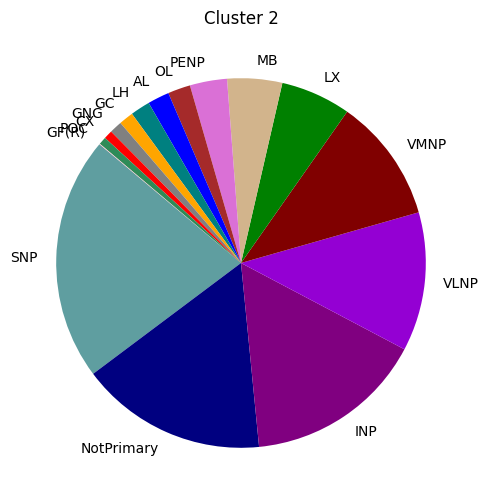

In [70]:
# Now this dataframe is ready to be used for plotting
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(final_data['total'], labels=final_data['super'], colors=final_data['color'], radius=1, startangle=140)
ax.set_title('Cluster 2')

# Function Cell

In [68]:
# These are all the steps I will use to create a function that will take in a cluster dataframe,
# a roi_list to filter by, and return a pie chart

# plot pie chart of roi data per cluster
def neuropil_plotter(df, clusters, plot_labels, roi_to_use, super_title, split = False, weight_threshold = 1, older_data = False):
    """ This function plots a pie chart of the roi data per cluster. You give it a basic dataframe with partition 
    data and it will process the dataframe by fetching roi data from all bodyIds and appending that to the df you give it. 
    From this, the function goes per cluster and groups the data by roi wile summming the downstream and upstream synapses 
    together to get a total for each roi You will need to have Neuprint client set up in your env to use this function.
    The function is able to accomodate v1.2 data and v1.2.1 data, please use the older_data parameter.

    df: Dataframe with partition data
    clusters: List of clusters to plot
    plot_labels: List of labels for each subplot
    roi_to_use: Should be a dataframe with Super column that includes all the neuropils to group into and a
                color column that assigns each neuropil a unique color
    super_title: Name of the connectome being plotted, used for plotting only
    split: If True, will use the Super_split column in roi_to_use to group by, if False, will use the Super column. 
                Default is False.
    weight_threshold: Minimum value for a roi to be included in the pie chart. Default is 1.
    older_data: If True, will use the older data processing method, if False, will use the newer data processing method. 
                Default is False.
    
    Plotting note: This function is set up to plot 2 by 3 for a total of 6 clusters. If this is different, 
    please adjust cluster list, the subplot dimensions, and ax[x, y].plot indexing.
    """
    # Isolate bodyIds from connectome
    log_msg("Isolating bodyIds")
    ids = df["id"] 

    # fetch neurons from neuprint for specific roi data
    log_msg("Fetching neurons from neuprint")
    _, roi = fetch_neurons(NC(bodyId=ids))

    # check that ids are the same (should be, but paranoia)
    log_msg("Checking that ids are the same")
    ids_fetched = _['bodyId'] 
    diff = ids[~ids.isin(ids_fetched)]
    if diff.empty:
        log_msg("All bodyIds are the same!")

    # Process fetched roi dataframe to include only rois in provided list 
    log_msg("Processing roi_df to include only rois in given list")
    roi_df_edit = roi[roi['roi'].isin(roi_to_use['L1'])]
    if split:
        roi_super_dict = roi_df.set_index('L1')['Super_split'].dropna().to_dict()
        color_dict = roi_df.set_index('Super_split')['Color'].dropna().to_dict()
    else:
        roi_super_dict = roi_df.set_index('L1')['Super'].dropna().to_dict()
        color_dict = roi_df.set_index('Super')['Color'].dropna().to_dict()

    # Merge cluster data and roi data
    full_roi = pd.merge(df, roi_df_edit, left_on='id', right_on='bodyId', how='inner')

    # Process data frame per cluster for pie chart
    # Uses this part if older neuprint version was used (v1.2), use this for hemibrain ploting
    if older_data:
        fig, ax = plt.subplots(2, 4, figsize=(15, 10))
        plt.suptitle(super_title, fontsize=20)
        for i in clusters: 
            roi_grouped = full_roi[full_roi['0.0'] == i].groupby('roi', as_index=False).agg({'downstream':'sum', 
                                                                                            'upstream':'sum'})

            # Assign preferred roi if want to group by super roi
            roi_grouped['super'] = roi_grouped['roi'].map(roi_super_dict)
            roi_grouped = roi_grouped.groupby('super', as_index=False).agg({'downstream':'sum', 'upstream':'sum'})

            # Add downstream and upstream together to get total for each roi
            roi_total = roi_grouped.assign(total = roi_grouped['downstream'] + roi_grouped['upstream'])  

            # Assigning unqiue color to each neuropil 
            roi_total['color'] = roi_total['super'].map(color_dict).fillna('black')

            # Filter roi_total by weight_threshold and sort by total in descending order
            data = roi_total[roi_total['total'] > weight_threshold].sort_values(by='total', ascending=False)

            # plot pie chart by value counts without none
            ax[int((i-1)/int(len(clusters)/2)), (i-1)%int(len(clusters)/2)].pie(data['total'], labels = data['super'], colors = data['color'], textprops={'fontsize': 14}, autopct='%1.1f%%',radius=0.95, startangle=0)
            ax[int((i-1)/int(len(clusters)/2)), (i-1)%int(len(clusters)/2)].set_title('Cluster ' + str(i), fontsize='medium')
            ax[int((i-1)/int(len(clusters)/2)), (i-1)%int(len(clusters)/2)].set_title(plot_labels[i-1], fontweight='bold', loc='left', fontsize='medium')
    
    # Uses this section for newer data such as v1.2.1
    else:
        fig, ax = plt.subplots(2, 3, figsize=(15, 10))
        plt.suptitle(super_title, fontsize=20)
        for i in clusters: 
            roi_grouped = full_roi[full_roi['0.0'] == i].groupby('roi', as_index=False).agg({'downstream_y':'sum', 
                                                                                            'upstream_y':'sum'})

            # Assign preferred roi
            roi_grouped['super'] = roi_grouped['roi'].map(roi_super_dict)
            roi_grouped = roi_grouped.groupby('super', as_index=False).agg({'downstream_y':'sum', 'upstream_y':'sum'})

            # Add downstream and upstream together to get total for each roi
            roi_total = roi_grouped.assign(total = roi_grouped['downstream_y'] + roi_grouped['upstream_y'])   
            roi_total['color'] = roi_total['super'].map(color_dict).fillna('black')
            # Filter roi_total by weight_threshold and sort by total in descending order
            data = roi_total[roi_total['total'] > weight_threshold].sort_values(by='total', ascending=False)
            # plot pie chart by value counts without none
            ax[int((i-1)/int(len(clusters)/2)), (i-1)%int(len(clusters)/2)].pie(data['total'], labels = data['super'], colors = data['color'], textprops={'fontsize': 14}, autopct='%1.1f%%',radius=0.95, startangle=0)
            ax[int((i-1)/int(len(clusters)/2)), (i-1)%int(len(clusters)/2)].set_title('Cluster ' + str(i), fontsize=16)
            ax[int((i-1)/int(len(clusters)/2)), (i-1)%int(len(clusters)/2)].set_title(plot_labels[i-1], fontweight='bold', loc='left', fontsize=16)
            
    

In [69]:
roi_df = pd.read_excel('all_roi_df.xlsx')

# Use the function and plot data
Things plotted below:
- Combined oviIN full, input and outputs
- oviIN_r connectome full
- hemibrain data

In [46]:
# Pull in partition data
direct = "oviIN_combined/preprocessed-" + hemibrain_version
filename = "preprocessed_nodes.csv"

log_msg("Loading node dataframe")
full_o = pd.read_csv(os.path.join(direct, filename))
log_msg("Done!")
full_o.head()

2024 04 02 17:19:33  Loading node dataframe
2024 04 02 17:19:33  Done!


,id,key,0.0,0.1,0.25,0.5,0.75,instance,celltype,pre,...,status,cropped,statusLabel,cellBodyFiber,somaRadius,somaLocation,roiInfo,notes,inputRois,outputRois
0,1003215282,1,1,1,1,1,1,CL229_R,CL229,100,...,Traced,False,Roughly traced,PDM19,301.0,"[23044, 14981, 11600]","{'INP': {'pre': 87, 'post': 351, 'downstream':...",NaN,"['EPA(R)', 'GOR(R)', 'IB', 'ICL(R)', 'INP', 'S...","['GOR(R)', 'IB', 'ICL(R)', 'INP', 'SCL(R)', 'S..."
1,1005952640,2,1,2,2,2,2,IB058_R,IB058,664,...,Traced,False,Roughly traced,PVL20,NaN,NaN,"{'INP': {'pre': 464, 'post': 1327, 'downstream...",NaN,"['ATL(R)', 'IB', 'ICL(R)', 'INP', 'PLP(R)', 'S...","['ATL(R)', 'IB', 'ICL(R)', 'INP', 'PLP(R)', 'S..."
2,1006928515,3,1,2,2,3,3,CL300_R,CL300,86,...,Traced,False,Roughly traced,PVL13,236.0,"[12083, 10523, 16816]","{'INP': {'pre': 79, 'post': 126, 'downstream':...",NaN,"['ATL(R)', 'IB', 'ICL(R)', 'INP', 'SCL(R)', 'S...","['ATL(R)', 'IB', 'ICL(R)', 'INP', 'SCL(R)', 'S..."
3,1007260806,4,1,1,1,4,4,CL301_R,CL301,119,...,Traced,False,Roughly traced,PVL13,236.0,"[13524, 10108, 16480]","{'INP': {'pre': 40, 'post': 128, 'downstream':...",NaN,"['GOR(R)', 'IB', 'ICL(R)', 'INP', 'PLP(R)', 'S...","['IB', 'ICL(R)', 'INP', 'PLP(R)', 'SCL(R)', 'S..."
4,1007308577,5,2,3,2,5,5,NaN,NaN,54,...,Traced,True,Leaves,NaN,NaN,NaN,"{'SNP(L)': {'pre': 5, 'post': 486, 'downstream...",NaN,"['ATL(L)', 'ATL(R)', 'GOR(L)', 'IB', 'ICL(L)',...","['ATL(L)', 'ATL(R)', 'IB', 'ICL(R)', 'INP', 'S..."


2024 04 02 17:19:58  Isolating bodyIds
2024 04 02 17:19:58  Fetching neurons from neuprint
2024 04 02 17:19:59  Checking that ids are the same
2024 04 02 17:19:59  All bodyIds are the same!
2024 04 02 17:19:59  Processing roi_df to include only rois in given list


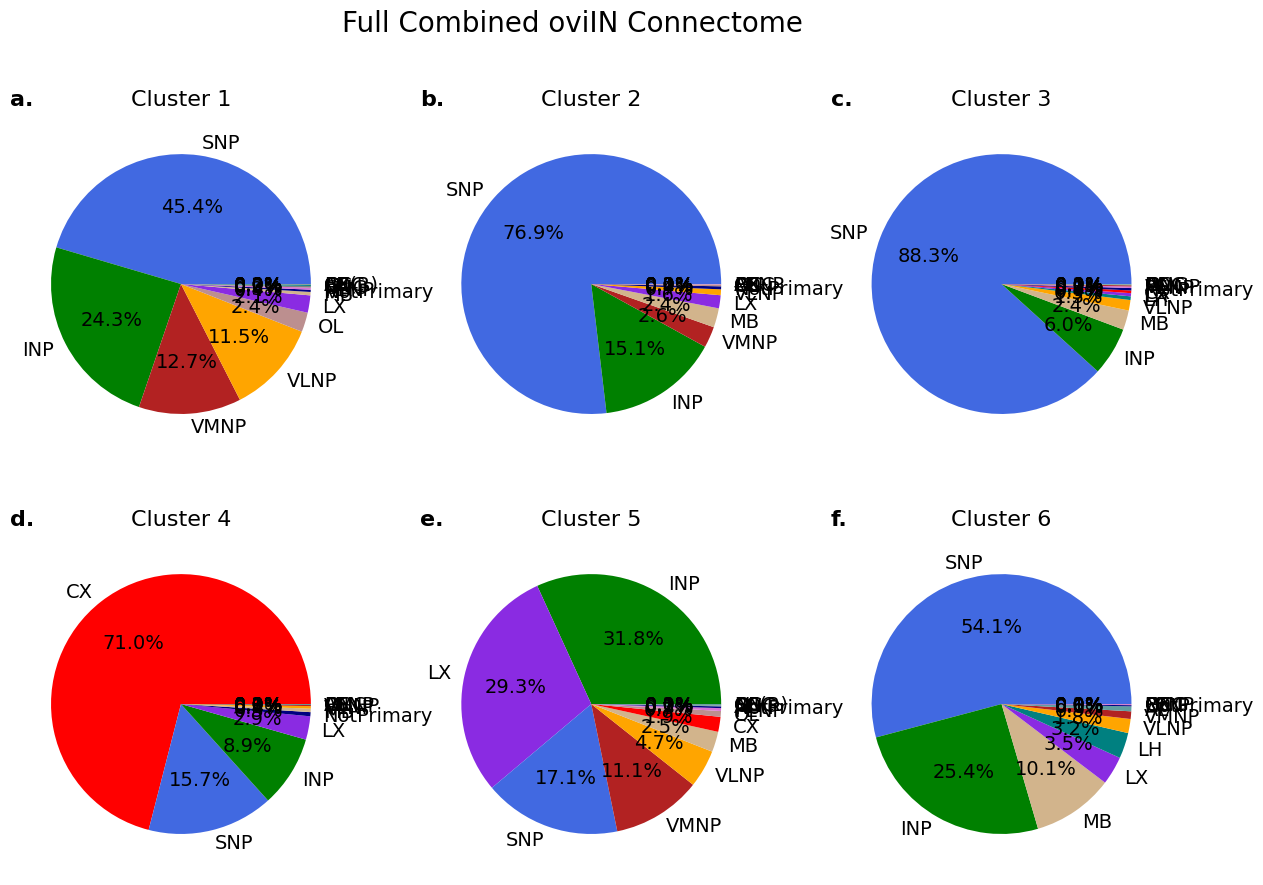

In [49]:
# Create cluster list and call function using full, cluster list, and roi_df 
# roi_df is the dataframe of neuropils we created in section 1
cluster_list = [1, 2, 3, 4, 5, 6]
subplots_list = ['a.', 'b.', 'c.', 'd.', 'e.', 'f.']
neuropil_plotter(full_o, cluster_list, subplots_list, roi_df, super_title='Full Combined oviIN Connectome')

In [24]:
# Inputs
direct = "oviIN_combined/preprocessed_inputs-" + hemibrain_version
filename = "preprocessed_nodes.csv"

log_msg("Loading node dataframe")
ins = pd.read_csv(os.path.join(direct, filename))
log_msg("Done!")
ins.head()

2024 04 02 17:15:27  Loading node dataframe
2024 04 02 17:15:27  Done!


,id,key,0.0,0.1,0.25,0.5,0.75,instance,celltype,pre,...,status,cropped,statusLabel,cellBodyFiber,somaRadius,somaLocation,roiInfo,notes,inputRois,outputRois
0,1003215282,1,1,1,1,1,1,CL229_R,CL229,100,...,Traced,False,Roughly traced,PDM19,301.0,"[23044, 14981, 11600]","{'INP': {'pre': 87, 'post': 351, 'downstream':...",NaN,"['EPA(R)', 'GOR(R)', 'IB', 'ICL(R)', 'INP', 'S...","['GOR(R)', 'IB', 'ICL(R)', 'INP', 'SCL(R)', 'S..."
1,1005952640,2,2,2,2,2,2,IB058_R,IB058,664,...,Traced,False,Roughly traced,PVL20,NaN,NaN,"{'INP': {'pre': 464, 'post': 1327, 'downstream...",NaN,"['ATL(R)', 'IB', 'ICL(R)', 'INP', 'PLP(R)', 'S...","['ATL(R)', 'IB', 'ICL(R)', 'INP', 'PLP(R)', 'S..."
2,1006928515,3,1,1,3,3,3,CL300_R,CL300,86,...,Traced,False,Roughly traced,PVL13,236.0,"[12083, 10523, 16816]","{'INP': {'pre': 79, 'post': 126, 'downstream':...",NaN,"['ATL(R)', 'IB', 'ICL(R)', 'INP', 'SCL(R)', 'S...","['ATL(R)', 'IB', 'ICL(R)', 'INP', 'SCL(R)', 'S..."
3,1007260806,4,1,1,3,4,4,CL301_R,CL301,119,...,Traced,False,Roughly traced,PVL13,236.0,"[13524, 10108, 16480]","{'INP': {'pre': 40, 'post': 128, 'downstream':...",NaN,"['GOR(R)', 'IB', 'ICL(R)', 'INP', 'PLP(R)', 'S...","['IB', 'ICL(R)', 'INP', 'PLP(R)', 'SCL(R)', 'S..."
4,1007644534,5,1,1,1,5,5,NaN,NaN,160,...,Traced,True,Leaves,NaN,NaN,NaN,"{'SNP(R)': {'pre': 24, 'post': 10, 'downstream...",NaN,"['IB', 'ICL(L)', 'ICL(R)', 'INP', 'SCL(L)', 'S...","['ATL(L)', 'IB', 'ICL(L)', 'ICL(R)', 'INP', 'S..."


2024 04 02 17:15:29  Isolating bodyIds
2024 04 02 17:15:29  Fetching neurons from neuprint
2024 04 02 17:15:30  Checking that ids are the same
2024 04 02 17:15:30  All bodyIds are the same!
2024 04 02 17:15:30  Processing roi_df to include only rois in given list


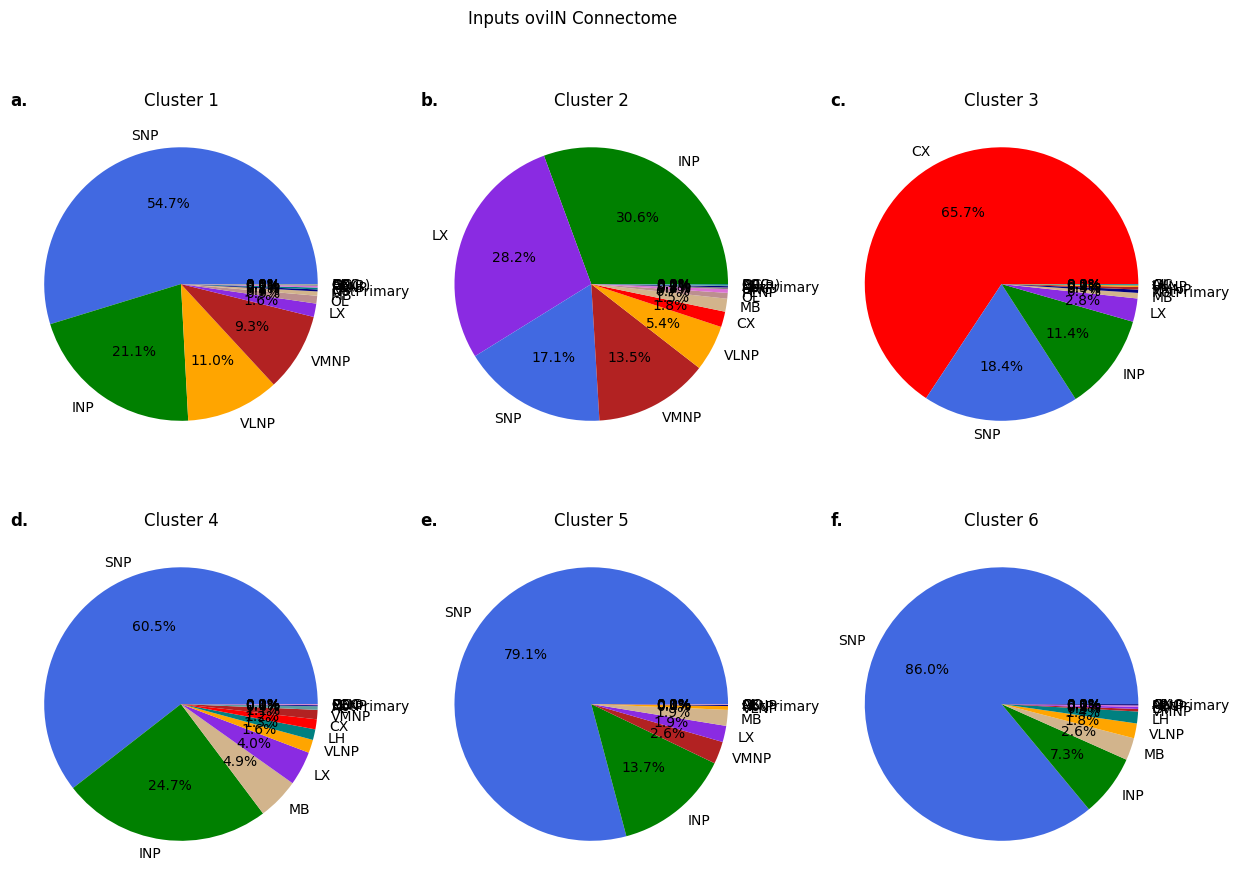

In [25]:
neuropil_plotter(ins, cluster_list, subplots_list, roi_df, super_title='Inputs oviIN Connectome')

In [122]:
# outputs
direct = "oviIN_combined/preprocessed_outputs-" + hemibrain_version
filename = "preprocessed_nodes.csv"

log_msg("Loading node dataframe")
outs = pd.read_csv(os.path.join(direct, filename))
log_msg("Done!")
outs.head()

2024 03 15 15:35:31  Loading node dataframe
2024 03 15 15:35:31  Done!


,id,key,0.0,0.1,0.25,0.5,0.75,instance,celltype,pre,...,status,cropped,statusLabel,cellBodyFiber,somaRadius,somaLocation,roiInfo,notes,inputRois,outputRois
0,1007308577,1,1,1,1,1,1,NaN,NaN,54,...,Traced,True,Leaves,NaN,NaN,NaN,"{'SNP(L)': {'pre': 5, 'post': 486, 'downstream...",NaN,"['ATL(L)', 'ATL(R)', 'GOR(L)', 'IB', 'ICL(L)',...","['ATL(L)', 'ATL(R)', 'IB', 'ICL(R)', 'INP', 'S..."
1,1007402796,2,2,2,2,2,2,PS119_R,PS119,245,...,Traced,False,Roughly traced,PDM16,301.0,"[25364, 12010, 12544]","{'SNP(R)': {'pre': 100, 'post': 50, 'downstrea...",NaN,"['CAN(R)', 'GOR(R)', 'IB', 'ICL(L)', 'ICL(R)',...","['AVLP(R)', 'CAN(R)', 'IB', 'ICL(L)', 'INP', '..."
2,1007640554,3,3,3,3,3,3,IB042_R,IB042,204,...,Traced,False,Roughly traced,PDM24,263.0,"[16520, 19387, 6576]","{'SNP(R)': {'pre': 3, 'post': 736, 'downstream...",NaN,"['ATL(R)', 'CRE(-ROB,-RUB)(R)', 'CRE(R)', 'IB'...","['ATL(R)', 'IB', 'INP', 'SIP(R)', 'SMP(R)', 'S..."
3,1007666180,4,2,4,4,4,4,NaN,NaN,0,...,Assign,NaN,0.5assign,NaN,NaN,NaN,"{'SNP(R)': {'post': 10}, 'SMP(R)': {'post': 10}}",NaN,"['SMP(R)', 'SNP(R)']",[]
4,1007735501,5,2,2,2,5,5,NaN,NaN,79,...,Traced,True,Leaves,NaN,NaN,NaN,"{'SNP(R)': {'pre': 31, 'post': 51, 'downstream...",NaN,"['ATL(L)', 'ICL(L)', 'INP', 'SCL(L)', 'SCL(R)'...","['ATL(L)', 'ICL(L)', 'INP', 'SCL(L)', 'SCL(R)'..."


2024 03 15 15:35:31  Isolating bodyIds
2024 03 15 15:35:31  Fetching neurons from neuprint
2024 03 15 15:35:33  Checking that ids are the same
2024 03 15 15:35:33  All bodyIds are the same!
2024 03 15 15:35:33  Processing roi_df to include only rois in given list


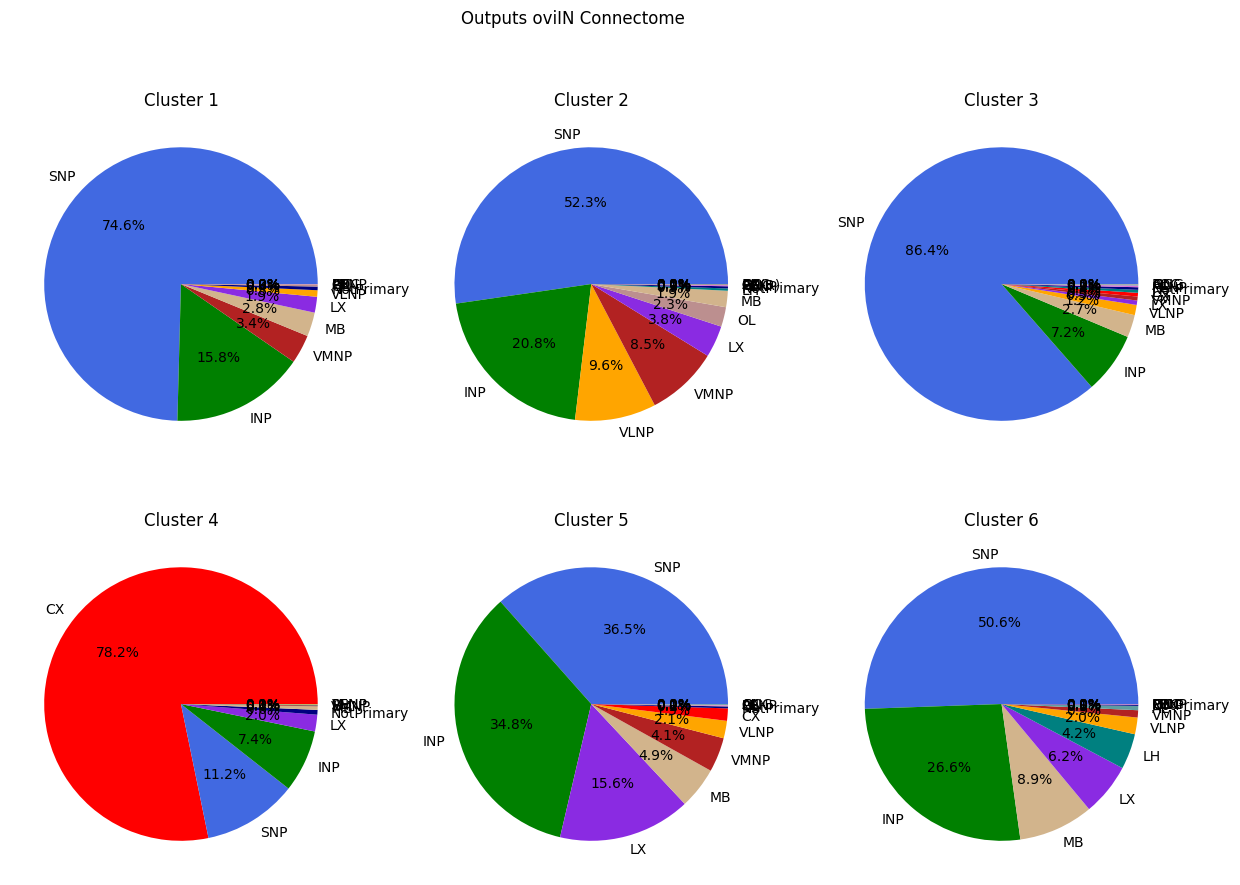

In [123]:
neuropil_plotter(outs, cluster_list, roi_df, super_title='Outputs oviIN Connectome')

In [124]:
# Full R onlu
direct = "oviIN_june29/preprocessed-" + hemibrain_version
filename = "preprocessed_nodes.csv"

log_msg("Loading node dataframe")
fullr = pd.read_csv(os.path.join(direct, filename))
log_msg("Done!")
fullr.head()

2024 03 15 15:35:34  Loading node dataframe
2024 03 15 15:35:34  Done!


,id,key,0.0,0.05,0.1,0.5,0.75,1.0,instance,celltype,...,status,cropped,statusLabel,cellBodyFiber,somaRadius,somaLocation,roiInfo,notes,inputRois,outputRois
0,1003215282,1,1,1,1,1,1,1,CL229_R,CL229,...,Traced,False,Roughly traced,PDM19,301.0,"[23044, 14981, 11600]","{'INP': {'pre': 87, 'post': 351, 'downstream':...",NaN,"['EPA(R)', 'GOR(R)', 'IB', 'ICL(R)', 'INP', 'S...","['GOR(R)', 'IB', 'ICL(R)', 'INP', 'SCL(R)', 'S..."
1,1005952640,2,1,1,2,2,2,2,IB058_R,IB058,...,Traced,False,Roughly traced,PVL20,NaN,NaN,"{'INP': {'pre': 464, 'post': 1327, 'downstream...",NaN,"['ATL(R)', 'IB', 'ICL(R)', 'INP', 'PLP(R)', 'S...","['ATL(R)', 'IB', 'ICL(R)', 'INP', 'PLP(R)', 'S..."
2,1006928515,3,1,1,1,3,3,3,CL300_R,CL300,...,Traced,False,Roughly traced,PVL13,236.0,"[12083, 10523, 16816]","{'INP': {'pre': 79, 'post': 126, 'downstream':...",NaN,"['ATL(R)', 'IB', 'ICL(R)', 'INP', 'SCL(R)', 'S...","['ATL(R)', 'IB', 'ICL(R)', 'INP', 'SCL(R)', 'S..."
3,1007260806,4,1,2,1,4,4,4,CL301_R,CL301,...,Traced,False,Roughly traced,PVL13,236.0,"[13524, 10108, 16480]","{'INP': {'pre': 40, 'post': 128, 'downstream':...",NaN,"['GOR(R)', 'IB', 'ICL(R)', 'INP', 'PLP(R)', 'S...","['IB', 'ICL(R)', 'INP', 'PLP(R)', 'SCL(R)', 'S..."
4,1007402796,5,1,1,2,5,5,5,PS119_R,PS119,...,Traced,False,Roughly traced,PDM16,301.0,"[25364, 12010, 12544]","{'SNP(R)': {'pre': 100, 'post': 50, 'downstrea...",NaN,"['CAN(R)', 'GOR(R)', 'IB', 'ICL(L)', 'ICL(R)',...","['AVLP(R)', 'CAN(R)', 'IB', 'ICL(L)', 'INP', '..."


2024 03 15 15:35:34  Isolating bodyIds
2024 03 15 15:35:34  Fetching neurons from neuprint
2024 03 15 15:35:37  Checking that ids are the same
2024 03 15 15:35:37  All bodyIds are the same!
2024 03 15 15:35:37  Processing roi_df to include only rois in given list


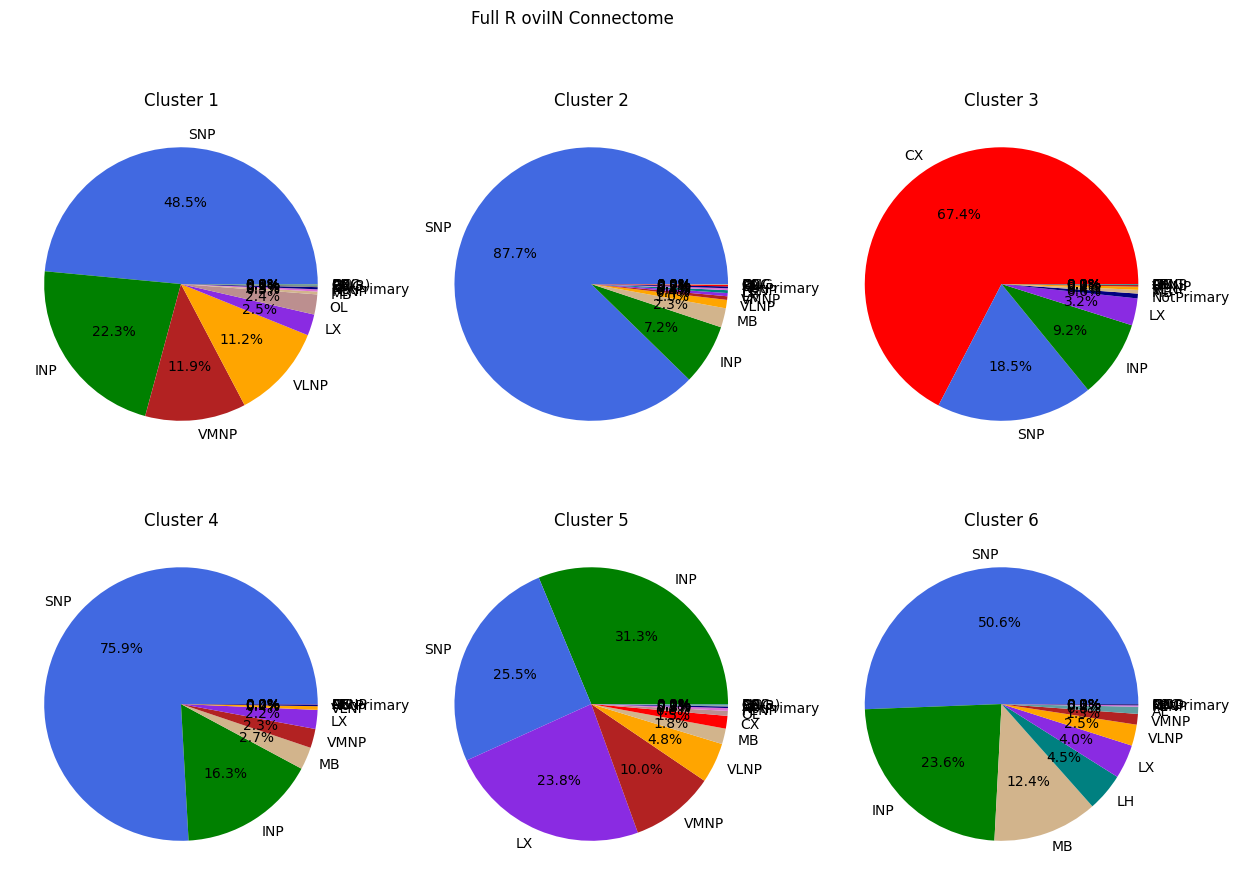

In [125]:
neuropil_plotter(fullr, cluster_list, roi_df, super_title='Full R oviIN Connectome')

In [77]:
# Hemibrain
direct = "hemibrain/preprocessed-v1.2"
filename = "preprocessed_nodes.csv"

log_msg("Loading node dataframe")
wb = pd.read_csv(os.path.join(direct, filename))
log_msg("Done!")
wb.head()

2024 04 02 17:47:03  Loading node dataframe
2024 04 02 17:47:03  Done!


,id,0.75,0.05,0.1,0.25,0.5,1.0,0.0,instance,celltype,...,size,status,cropped,statusLabel,cellBodyFiber,somaRadius,somaLocation,inputRois,outputRois,roiInfo
0,200326126,1,1,1,1,1,1,1,CL141_L,CL141,...,827930581,Traced,False,Roughly traced,PDL20,251.0,"[3844, 14565, 15568]","['AVLP(R)', 'IB', 'ICL(R)', 'INP', 'LH(R)', 'M...","['AVLP(R)', 'ICL(R)', 'INP', 'LH(R)', 'MB(+ACA...","{'SNP(R)': {'pre': 17, 'post': 19, 'downstream..."
1,202916528,2,2,2,2,2,2,2,FS4C(FQ12)_C4_R,FS4C,...,235674230,Traced,False,Roughly traced,PDM03,301.0,"[20091, 12266, 12208]","['CX', 'FB', 'FB-column3', 'FBl1', 'FBl2', 'FB...","['CX', 'FB', 'FBl7', 'SMP(L)', 'SNP(L)']","{'SNP(L)': {'pre': 93, 'post': 35, 'downstream..."
2,203253072,3,2,3,3,3,3,2,FS4A(AB)(FQ12)_C3_R,FS4A,...,154283963,Traced,False,Roughly traced,PDM03,236.0,"[17809, 10233, 14208]","['AB(R)', 'CRE(-RUB)(L)', 'CRE(L)', 'CX', 'FB'...","['AB(R)', 'CX', 'FB', 'FB-column3', 'FBl1', 'F...","{'SNP(L)': {'pre': 52, 'post': 30, 'downstream..."
3,203253253,4,3,3,4,4,4,2,SMP505(PDM22)_L,SMP505,...,1763416504,Traced,False,Roughly traced,NaN,351.0,"[32168, 13757, 13336]","['ATL(L)', 'CRE(-RUB)(L)', 'CRE(L)', 'ICL(L)',...","['SIP(L)', 'SIP(R)', 'SLP(R)', 'SMP(L)', 'SMP(...","{'SNP(L)': {'pre': 150, 'post': 2282, 'downstr..."
4,203257652,5,2,3,2,2,2,2,FS4C(FQ12)_C6_R,FS4C,...,209983364,Traced,False,Roughly traced,PDM02,301.0,"[22758, 16749, 10240]","['CX', 'FB', 'FBl1', 'FBl2', 'FBl3', 'FBl4', '...","['SIP(L)', 'SMP(L)', 'SNP(L)']","{'SNP(L)': {'pre': 65, 'post': 36, 'downstream..."


2024 04 02 17:10:39  Isolating bodyIds
2024 04 02 17:10:39  Fetching neurons from neuprint
2024 04 02 17:10:45  Checking that ids are the same
2024 04 02 17:10:45  All bodyIds are the same!
2024 04 02 17:10:45  Processing roi_df to include only rois in given list


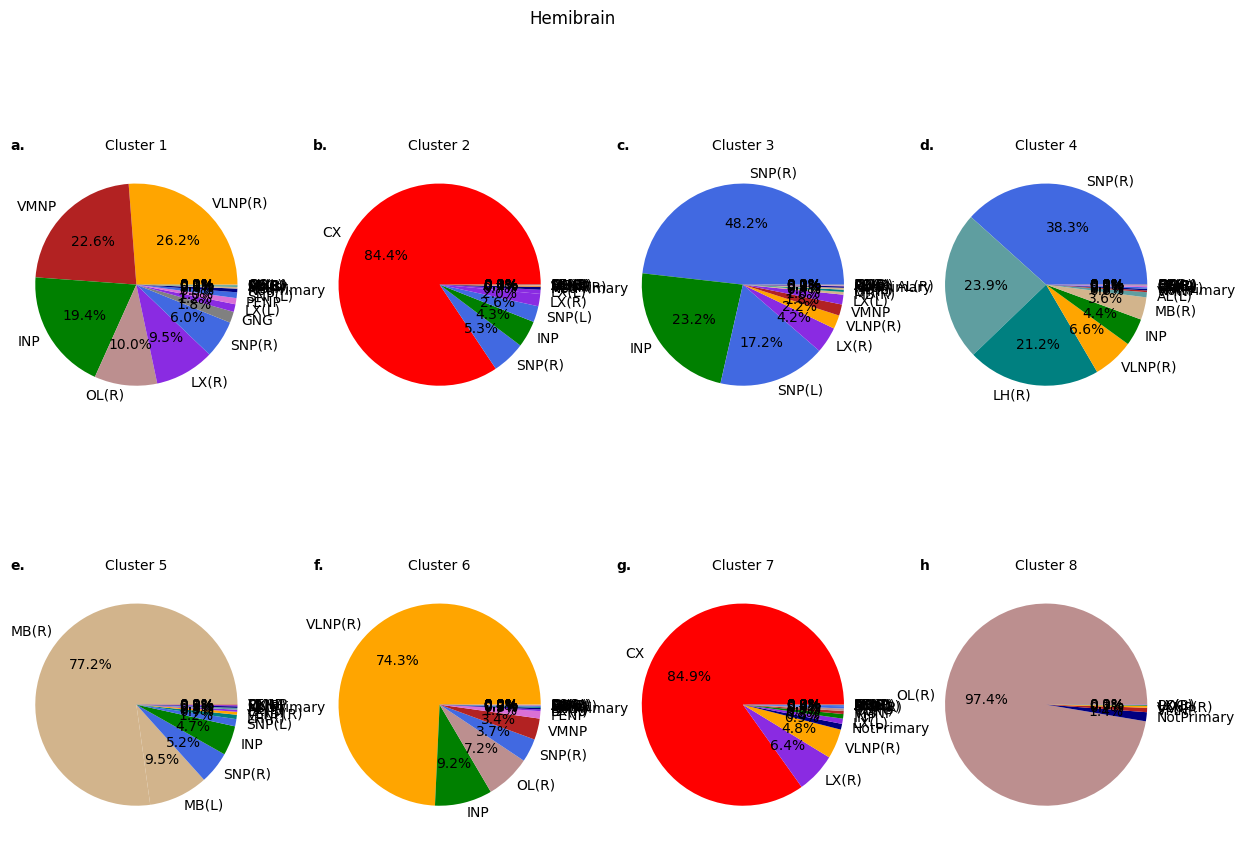

In [15]:
cluster_wb = [1, 2, 3, 4, 5, 6, 7, 8]
subplot_wb = ['a.', 'b.', 'c.', 'd.', 'e.', 'f.', 'g.', 'h']
neuropil_plotter(wb, cluster_wb, subplot_wb, roi_df, super_title='Hemibrain', older_data=True, split=True)

# Lower level plotting for specific analysis

In [70]:
roi_l2 = roi_df['L2'].dropna()

In [71]:
# Create dataframe aligning to l2
roi_edited2 = roi_info[roi_info['roi'].isin(roi_l2)]
# Attach roi_info to the full partition dataframe
full_roi2 = pd.merge(full, roi_edited2, left_on='id', right_on='bodyId', how='inner')
full_roi2

,id,key,0.0,0.1,0.25,0.5,0.75,instance,celltype,pre_x,...,notes,inputRois,outputRois,bodyId,roi,pre_y,post_y,downstream_y,upstream_y,mito_y
0,1003215282,1,1,1,1,1,1,CL229_R,CL229,100,...,NaN,"['EPA(R)', 'GOR(R)', 'IB', 'ICL(R)', 'INP', 'S...","['GOR(R)', 'IB', 'ICL(R)', 'INP', 'SCL(R)', 'S...",1003215282,EPA(R),0,7,0,7,1
1,1003215282,1,1,1,1,1,1,CL229_R,CL229,100,...,NaN,"['EPA(R)', 'GOR(R)', 'IB', 'ICL(R)', 'INP', 'S...","['GOR(R)', 'IB', 'ICL(R)', 'INP', 'SCL(R)', 'S...",1003215282,GOR(R),12,52,83,52,10
2,1003215282,1,1,1,1,1,1,CL229_R,CL229,100,...,NaN,"['EPA(R)', 'GOR(R)', 'IB', 'ICL(R)', 'INP', 'S...","['GOR(R)', 'IB', 'ICL(R)', 'INP', 'SCL(R)', 'S...",1003215282,IB,22,91,143,91,20
3,1003215282,1,1,1,1,1,1,CL229_R,CL229,100,...,NaN,"['EPA(R)', 'GOR(R)', 'IB', 'ICL(R)', 'INP', 'S...","['GOR(R)', 'IB', 'ICL(R)', 'INP', 'SCL(R)', 'S...",1003215282,ICL(R),52,202,476,202,32
4,1003215282,1,1,1,1,1,1,CL229_R,CL229,100,...,NaN,"['EPA(R)', 'GOR(R)', 'IB', 'ICL(R)', 'INP', 'S...","['GOR(R)', 'IB', 'ICL(R)', 'INP', 'SCL(R)', 'S...",1003215282,NotPrimary,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37404,989228019,6343,5,9,16,133,72,FB5V_R,FB5V,322,...,CRELALFB5,"['CRE(-ROB,-RUB)(R)', 'CRE(R)', 'CX', 'FB', 'F...","['CRE(-ROB,-RUB)(R)', 'CRE(R)', 'CX', 'FB', 'F...",989228019,CRE(R),40,925,275,925,94
37405,989228019,6343,5,9,16,133,72,FB5V_R,FB5V,322,...,CRELALFB5,"['CRE(-ROB,-RUB)(R)', 'CRE(R)', 'CX', 'FB', 'F...","['CRE(-ROB,-RUB)(R)', 'CRE(R)', 'CX', 'FB', 'F...",989228019,FB,260,505,2094,505,93
37406,989228019,6343,5,9,16,133,72,FB5V_R,FB5V,322,...,CRELALFB5,"['CRE(-ROB,-RUB)(R)', 'CRE(R)', 'CX', 'FB', 'F...","['CRE(-ROB,-RUB)(R)', 'CRE(R)', 'CX', 'FB', 'F...",989228019,LAL(R),17,522,102,522,45
37407,989228019,6343,5,9,16,133,72,FB5V_R,FB5V,322,...,CRELALFB5,"['CRE(-ROB,-RUB)(R)', 'CRE(R)', 'CX', 'FB', 'F...","['CRE(-ROB,-RUB)(R)', 'CRE(R)', 'CX', 'FB', 'F...",989228019,NotPrimary,4,9,32,9,34


In [73]:
roi_grouped

,roi,downstream_y,upstream_y
0,AL-D(R),12,165
1,AL-DA1(R),548,653
2,AL-DA2(R),0,29
3,AL-DC1(R),29,361
4,AL-DC2(R),7,67
...,...,...,...
107,gL(L),15497,20984
108,lACA(R),8,0
109,mALT(L),36,18
110,mALT(R),113,92


In [74]:
color_dict

{nan: 'firebrick',
 'AOT(R)': 'brown',
 'GC': 'lightcoral',
 'GF(R)': 'pink',
 'GNG': 'grey',
 'LH(R)': 'teal',
 'POC': 'seagreen',
 'mALT(L)': 'cadetblue',
 'mALT(R)': 'cadetblue',
 'NotPrimary': 'navy'}

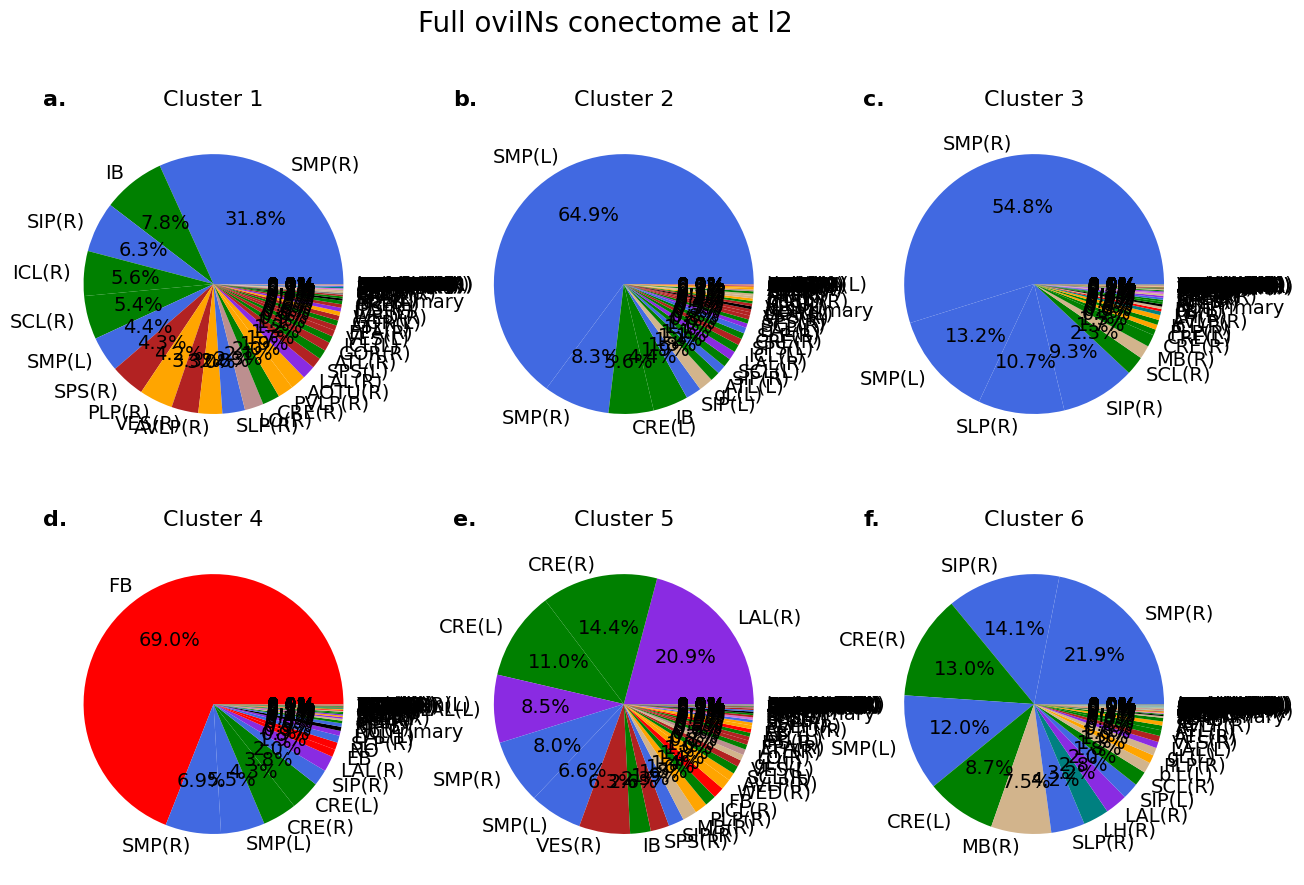

In [75]:
plot_labels = ['a.', 'b.', 'c.', 'd.', 'e.', 'f.']
clusters = [1, 2, 3, 4, 5, 6]
weight_threshold = 1
color_dict = roi_df.set_index('L2')['Color2'].dropna().to_dict()
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
plt.suptitle("Full oviINs conectome at l2", fontsize=20)
for i in clusters: 
    roi_grouped = full_roi2[full_roi2['0.0'] == i].groupby('roi', as_index=False).agg({'downstream_y':'sum', 
                                                                                            'upstream_y':'sum'})
    # Add downstream and upstream together to get total for each roi
    roi_total = roi_grouped.assign(total = roi_grouped['downstream_y'] + roi_grouped['upstream_y'])   
    roi_total['color'] = roi_total['roi'].map(color_dict).fillna('black')
    # Filter roi_total by weight_threshold and sort by total in descending order
    data = roi_total[roi_total['total'] > weight_threshold].sort_values(by='total', ascending=False)
    # plot pie chart by value counts without none
    ax[int((i-1)/int(len(clusters)/2)), (i-1)%int(len(clusters)/2)].pie(data['total'], labels = data['roi'], colors = data['color'], textprops={'fontsize': 14}, autopct='%1.1f%%',radius=0.95, startangle=0)
    ax[int((i-1)/int(len(clusters)/2)), (i-1)%int(len(clusters)/2)].set_title('Cluster ' + str(i), fontsize=16)
    ax[int((i-1)/int(len(clusters)/2)), (i-1)%int(len(clusters)/2)].set_title(plot_labels[i-1], fontweight='bold', loc='left', fontsize=16)

In [83]:
wb

,id,0.75,0.05,0.1,0.25,0.5,1.0,0.0,instance,celltype,...,size,status,cropped,statusLabel,cellBodyFiber,somaRadius,somaLocation,inputRois,outputRois,roiInfo
0,200326126,1,1,1,1,1,1,1,CL141_L,CL141,...,827930581,Traced,False,Roughly traced,PDL20,251.0,"[3844, 14565, 15568]","['AVLP(R)', 'IB', 'ICL(R)', 'INP', 'LH(R)', 'M...","['AVLP(R)', 'ICL(R)', 'INP', 'LH(R)', 'MB(+ACA...","{'SNP(R)': {'pre': 17, 'post': 19, 'downstream..."
1,202916528,2,2,2,2,2,2,2,FS4C(FQ12)_C4_R,FS4C,...,235674230,Traced,False,Roughly traced,PDM03,301.0,"[20091, 12266, 12208]","['CX', 'FB', 'FB-column3', 'FBl1', 'FBl2', 'FB...","['CX', 'FB', 'FBl7', 'SMP(L)', 'SNP(L)']","{'SNP(L)': {'pre': 93, 'post': 35, 'downstream..."
2,203253072,3,2,3,3,3,3,2,FS4A(AB)(FQ12)_C3_R,FS4A,...,154283963,Traced,False,Roughly traced,PDM03,236.0,"[17809, 10233, 14208]","['AB(R)', 'CRE(-RUB)(L)', 'CRE(L)', 'CX', 'FB'...","['AB(R)', 'CX', 'FB', 'FB-column3', 'FBl1', 'F...","{'SNP(L)': {'pre': 52, 'post': 30, 'downstream..."
3,203253253,4,3,3,4,4,4,2,SMP505(PDM22)_L,SMP505,...,1763416504,Traced,False,Roughly traced,NaN,351.0,"[32168, 13757, 13336]","['ATL(L)', 'CRE(-RUB)(L)', 'CRE(L)', 'ICL(L)',...","['SIP(L)', 'SIP(R)', 'SLP(R)', 'SMP(L)', 'SMP(...","{'SNP(L)': {'pre': 150, 'post': 2282, 'downstr..."
4,203257652,5,2,3,2,2,2,2,FS4C(FQ12)_C6_R,FS4C,...,209983364,Traced,False,Roughly traced,PDM02,301.0,"[22758, 16749, 10240]","['CX', 'FB', 'FBl1', 'FBl2', 'FBl3', 'FBl4', '...","['SIP(L)', 'SMP(L)', 'SNP(L)']","{'SNP(L)': {'pre': 65, 'post': 36, 'downstream..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21734,7112579856,2322,1,1,157,1064,3243,1,LC20,LC20,...,462394896,Traced,False,Roughly traced,NaN,301.5,"[7883, 23524, 33072]","['LO(R)', 'OL(R)', 'PLP(R)', 'VLNP(R)']","['LO(R)', 'OL(R)', 'PLP(R)', 'VLNP(R)']","{'OL(R)': {'pre': 268, 'post': 594, 'downstrea..."
21735,7112615127,2670,9,19,46,226,3110,6,AVLP335_R,AVLP335,...,453081149,Traced,False,Roughly traced,AVL13,NaN,NaN,"['AVLP(R)', 'PVLP(R)', 'VLNP(R)']","['AVLP(R)', 'PVLP(R)', 'VLNP(R)']","{'VLNP(R)': {'pre': 362, 'post': 577, 'downstr..."
21736,7112617294,2386,9,19,46,226,3362,6,AVLP331_R,AVLP331,...,438751734,Traced,False,Roughly traced,AVL13,NaN,NaN,"['AVLP(R)', 'PVLP(R)', 'VLNP(R)']","['AVLP(R)', 'PVLP(R)', 'VLNP(R)']","{'VLNP(R)': {'pre': 285, 'post': 661, 'downstr..."
21737,7112622044,879,3,8,14,120,2836,3,LAL137(PVL05)_L,LAL137,...,1529252938,Traced,False,Roughly traced,NaN,NaN,NaN,"['CRE(-ROB,-RUB)(R)', 'CRE(-RUB)(L)', 'CRE(L)'...","['CRE(-ROB,-RUB)(R)', 'CRE(-RUB)(L)', 'CRE(L)'...","{'SNP(R)': {'pre': 304, 'post': 130, 'downstre..."


In [84]:
# Create dataframe aligning to l2
roi_edited2 = roi_info[roi_info['roi'].isin(roi_l2)]

# Attach roi_info to the full partition dataframe
full_roi2 = pd.merge(wb, roi_edited2, left_on='id', right_on='bodyId', how='inner')
full_roi2

,id,0.75,0.05,0.1,0.25,0.5,1.0,0.0,instance,celltype,...,inputRois,outputRois,roiInfo,bodyId,roi,pre_y,post_y,downstream,upstream,mito
0,203253253,4,3,3,4,4,4,2,SMP505(PDM22)_L,SMP505,...,"['ATL(L)', 'CRE(-RUB)(L)', 'CRE(L)', 'ICL(L)',...","['SIP(L)', 'SIP(R)', 'SLP(R)', 'SMP(L)', 'SMP(...","{'SNP(L)': {'pre': 150, 'post': 2282, 'downstr...",203253253,ATL(L),0,13,0,13,5
1,203253253,4,3,3,4,4,4,2,SMP505(PDM22)_L,SMP505,...,"['ATL(L)', 'CRE(-RUB)(L)', 'CRE(L)', 'ICL(L)',...","['SIP(L)', 'SIP(R)', 'SLP(R)', 'SMP(L)', 'SMP(...","{'SNP(L)': {'pre': 150, 'post': 2282, 'downstr...",203253253,CRE(L),0,6,0,6,6
2,203253253,4,3,3,4,4,4,2,SMP505(PDM22)_L,SMP505,...,"['ATL(L)', 'CRE(-RUB)(L)', 'CRE(L)', 'ICL(L)',...","['SIP(L)', 'SIP(R)', 'SLP(R)', 'SMP(L)', 'SMP(...","{'SNP(L)': {'pre': 150, 'post': 2282, 'downstr...",203253253,ICL(L),0,22,0,22,1
3,203253253,4,3,3,4,4,4,2,SMP505(PDM22)_L,SMP505,...,"['ATL(L)', 'CRE(-RUB)(L)', 'CRE(L)', 'ICL(L)',...","['SIP(L)', 'SIP(R)', 'SLP(R)', 'SMP(L)', 'SMP(...","{'SNP(L)': {'pre': 150, 'post': 2282, 'downstr...",203253253,NotPrimary,0,10,0,10,55
4,203253253,4,3,3,4,4,4,2,SMP505(PDM22)_L,SMP505,...,"['ATL(L)', 'CRE(-RUB)(L)', 'CRE(L)', 'ICL(L)',...","['SIP(L)', 'SIP(R)', 'SLP(R)', 'SMP(L)', 'SMP(...","{'SNP(L)': {'pre': 150, 'post': 2282, 'downstr...",203253253,SCL(L),0,42,0,42,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27979,7112622044,879,3,8,14,120,2836,3,LAL137(PVL05)_L,LAL137,...,"['CRE(-ROB,-RUB)(R)', 'CRE(-RUB)(L)', 'CRE(L)'...","['CRE(-ROB,-RUB)(R)', 'CRE(-RUB)(L)', 'CRE(L)'...","{'SNP(R)': {'pre': 304, 'post': 130, 'downstre...",7112622044,SMP(L),287,230,2528,230,66
27980,7112622044,879,3,8,14,120,2836,3,LAL137(PVL05)_L,LAL137,...,"['CRE(-ROB,-RUB)(R)', 'CRE(-RUB)(L)', 'CRE(L)'...","['CRE(-ROB,-RUB)(R)', 'CRE(-RUB)(L)', 'CRE(L)'...","{'SNP(R)': {'pre': 304, 'post': 130, 'downstre...",7112622044,SMP(R),292,128,2602,128,52
27981,7112622044,879,3,8,14,120,2836,3,LAL137(PVL05)_L,LAL137,...,"['CRE(-ROB,-RUB)(R)', 'CRE(-RUB)(L)', 'CRE(L)'...","['CRE(-ROB,-RUB)(R)', 'CRE(-RUB)(L)', 'CRE(L)'...","{'SNP(R)': {'pre': 304, 'post': 130, 'downstre...",7112622044,VES(L),41,127,281,127,40
27982,7112622044,879,3,8,14,120,2836,3,LAL137(PVL05)_L,LAL137,...,"['CRE(-ROB,-RUB)(R)', 'CRE(-RUB)(L)', 'CRE(L)'...","['CRE(-ROB,-RUB)(R)', 'CRE(-RUB)(L)', 'CRE(L)'...","{'SNP(R)': {'pre': 304, 'post': 130, 'downstre...",7112622044,VES(R),15,4,137,4,2


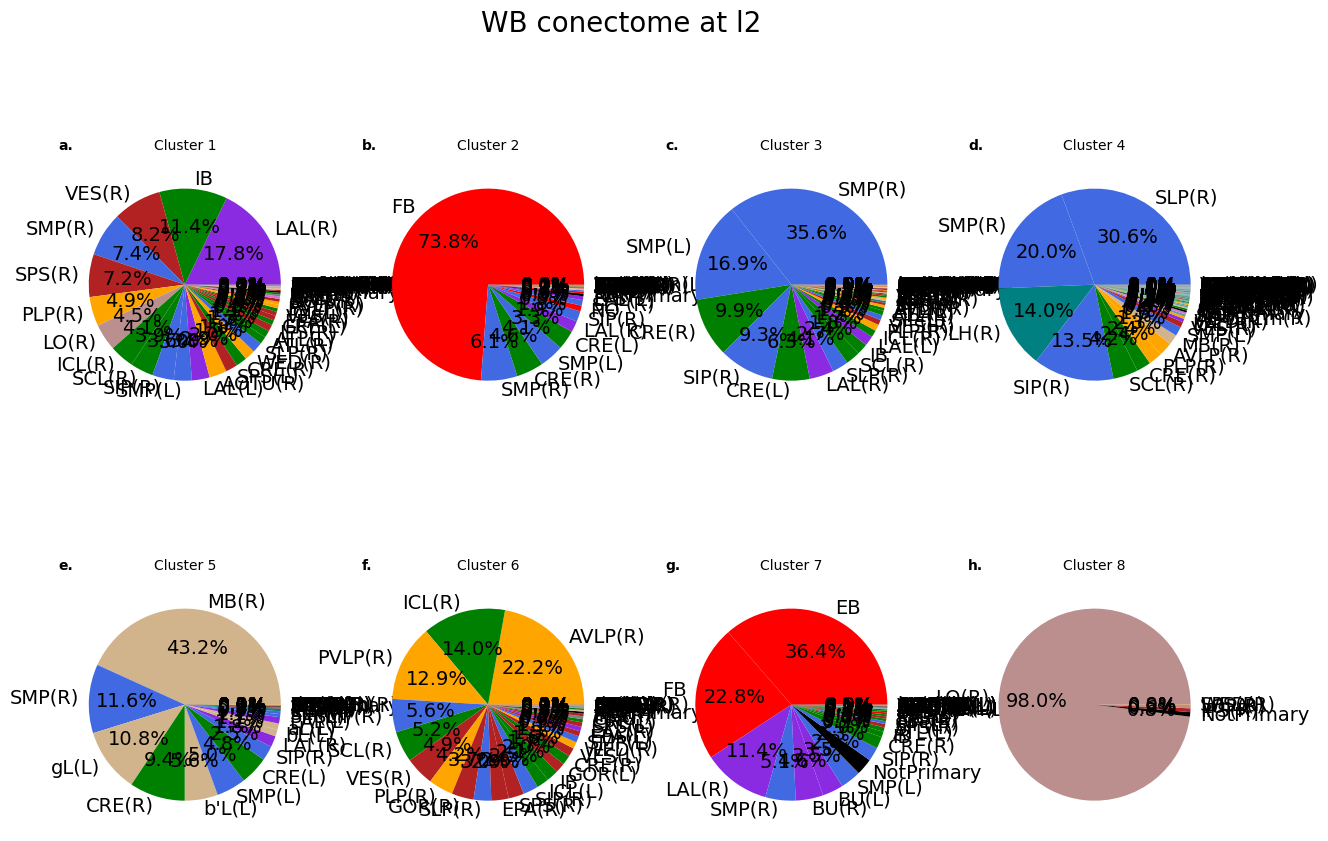

In [85]:
plot_labels = ['a.', 'b.', 'c.', 'd.', 'e.', 'f.', 'g.', 'h.']
clusters = [1, 2, 3, 4, 5, 6, 7, 8]
weight_threshold = 1
color_dict = roi_df.set_index('L2')['Color2'].dropna().to_dict()
fig, ax = plt.subplots(2, 4, figsize=(15, 10))
plt.suptitle("WB conectome at l2", fontsize=20)
for i in clusters: 
    roi_grouped = full_roi2[full_roi2['0.0'] == i].groupby('roi', as_index=False).agg({'downstream':'sum', 
                                                                                            'upstream':'sum'})

    # Add downstream and upstream together to get total for each roi
    roi_total = roi_grouped.assign(total = roi_grouped['downstream'] + roi_grouped['upstream'])  

    # Assigning unqiue color to each neuropil 
    roi_total['color'] = roi_total['roi'].map(color_dict).fillna('black')

    # Filter roi_total by weight_threshold and sort by total in descending order
    data = roi_total[roi_total['total'] > weight_threshold].sort_values(by='total', ascending=False)

    # plot pie chart by value counts without none
    ax[int((i-1)/int(len(clusters)/2)), (i-1)%int(len(clusters)/2)].pie(data['total'], labels = data['roi'], colors = data['color'], textprops={'fontsize': 14}, autopct='%1.1f%%',radius=0.95, startangle=0)
    ax[int((i-1)/int(len(clusters)/2)), (i-1)%int(len(clusters)/2)].set_title('Cluster ' + str(i), fontsize='medium')
    ax[int((i-1)/int(len(clusters)/2)), (i-1)%int(len(clusters)/2)].set_title(plot_labels[i-1], fontweight='bold', loc='left', fontsize='medium')